In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline
plt.rc('figure', figsize=(10, 6))
from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

베이즈 정리 <BR>
P(A|B) = P(B|A) * P(A) /P(B) 

In [2]:
P_A = 0.1 # 암의 확률
P_NOT_A = 1 - P_A # 암이 아닐 확률
P_B_GIVEN_A = 0.95 # 양성 판정의 정확도
P_B_GIVEN_NOT_A = 0.05 # 암이 아닌데, 양성 판정이 나올 확률

# 베이즈의 정리
P_A_GIVEN_B = P_B_GIVEN_A * P_A / ((P_B_GIVEN_A*P_A)+(P_B_GIVEN_NOT_A*P_NOT_A))
P_A_GIVEN_B

0.6785714285714285

# 확률의 계산

In [16]:
# 동전던지기
space = ['앞면','뒷면']
event = ['앞면']

prob = lambda event, space : len(event)/len(space)
prob(event, space)


0.5

In [17]:
# 주사위 던지기
# 1번 던져 3이 나올 확률
space = [1,2,3,4,5,6]
event = [3]
prob(event, space)

0.16666666666666666

In [18]:
# 확률의 덧셈

In [21]:
## 주사위에서 짝수이거나 4보다 큰 수가 나올 확률 
space = {1,2,3,4,5,6}
event_A = {2,4,6}
event_B = {5,6}

In [22]:
합집합 = event_A | event_B
합집합

{2, 4, 5, 6}

In [23]:
합집합의갯수 = len(합집합)
전체경우의수 = len(space)
확률_1 = 합집합의갯수/전체경우의수
확률_1 # 짝수 또는 4보다 큰 눈이 나올 확률

0.6666666666666666

In [24]:
# 2이하이거나 5이상인 눈이 나올 확률
event_C = {1,2}
event_D = {5,6}
합집합_1 = event_C | event_D
합집합의갯수_1 = len(합집합_1)
확률_2 = 합집합의갯수_1/전체경우의수
확률_2


0.6666666666666666

In [31]:
# 주사위를 던져 짝수 & 2일 확률
# 조건부 확률
sample_space = [1,2,3,4,5,6]
event_A = [2,4,6]
event_B = [2]
P_A = len(event_A)/len(sample_space)    # A일확률
P_B = len(event_B)/len(sample_space)    # B일확률
P_B_and_A_ele = set(event_A) & set(event_B) # 교집합의 원소
P_B_and_A = len(P_B_and_A_ele)/len(sample_space)    # 교집합이 나올 확률
P_B_and_A


0.16666666666666666

In [32]:
# 조건부확률 : 짝수이면서 2가 나올 확률
# P(B|A) = P(B_and_A)/P_A
P_B_GIVEN_A = P_B_and_A/P_A
P_B_GIVEN_A

0.3333333333333333

# 우도와 확률값

동전 10번 던지고, 8번 앞면이 나왔다.<br>
우도의 계산

In [39]:
from scipy.stats import binom
n = 10
k = 8 # 앞면의 횟수

# 가설1 - 공정한 동전일 것이다
p1 = 0.5 # 앞면이 나올 확률 - 공정할 경우
p1_likelihood = binom.pmf(k, n, p1) #조건, 총사건, 확률
p2 = 0.8
p2_likelihood = binom.pmf(k, n, p2) #조건, 총사건, 확률
p1_likelihood, p2_likelihood

(np.float64(0.04394531250000005), np.float64(0.30198988799999993))

가설 1의 경우, 앞면이 8번 나올 확률은 4.4%<br>
가설 2의 경우, 앞면이 8번 나올 확률은 30.2%

앞면이 8번 나오는 관측값은 p=0.8인 모델이 더 잘 설명한다. (우도가 크다)

# 기대값
x의 확률들의 평균

In [44]:
x_values = [1,2,3]
p_x = [1/6,3/6,2/6]

exp_vlaue=0
# 기대값
for i in range(len(x_values)):  
    exp_vlaue += x_values[i] * p_x[i]
    
print(f'기대값 : {exp_vlaue:.5f}')

기대값 : 2.16667


In [48]:
from scipy.stats import norm
import  pandas as pd

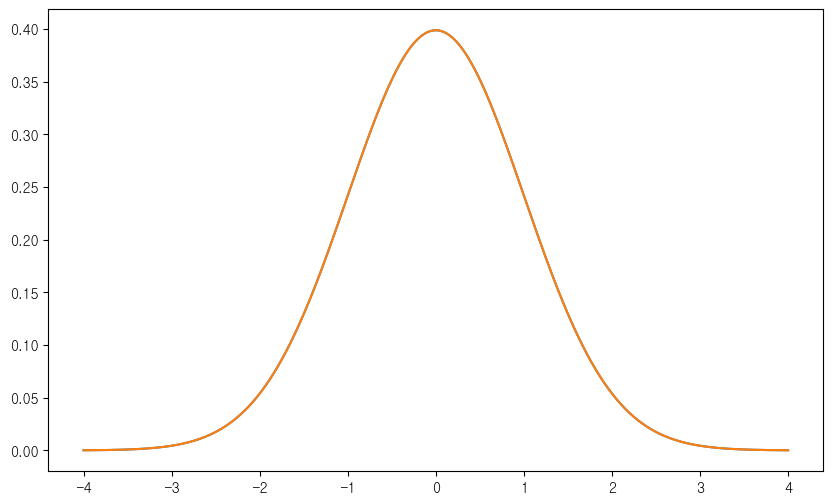

In [53]:
mu = 0
sigma = 1

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc= mu, scale= sigma)
plt.plot(x,y)
plt.show()

# 표집 분포 

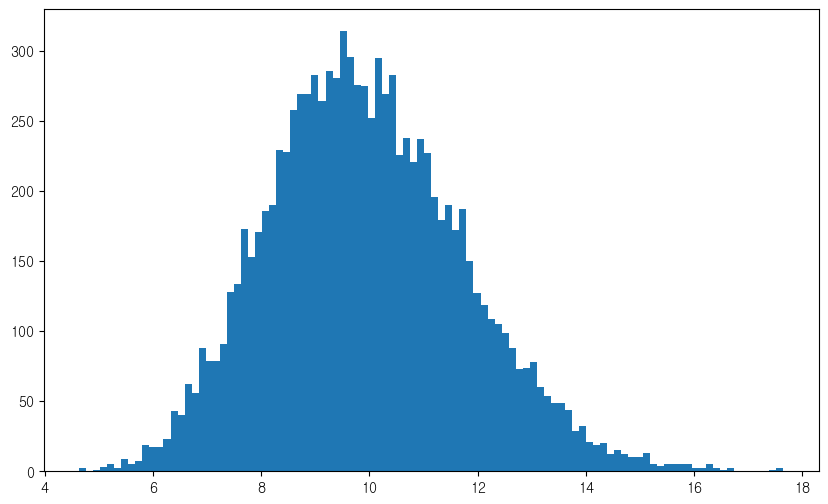

In [60]:
np.random.seed(0)
x_pop = np.random.exponential(scale=10, size=10000)
sample_mean = [np.mean(np.random.choice(x_pop, size=30))
               for _ in range(10000)]

plt.hist(sample_mean, bins=100)
plt.show()

# Z점수 

In [62]:
mu = 100
sigma = 10

x1 = 110    #z점수를 계산하려고 하는 원래 점수
x2 = 125   

# z점수 = 원점수 - 평균 / 표준편차
z_x1 = (x1 - mu)/sigma
z_x2 = (x2 - mu)/sigma
z_x1, z_x2

(1.0, 2.5)

z_x1 = 0.8413 -> 0.5에서 출발 -> 0.3413<br>
z_x2 = 0.9938 -> 0.5에서 출발 -> 0.4938<br>
0.4938 - 0.3413 = 0.1525 -> 15% 

In [66]:
area_z_x1 = norm.cdf(z_x1) - norm.cdf(0)
area_z_x2 = norm.cdf(z_x2) - norm.cdf(0)
diff_area = area_z_x2 - area_z_x1
diff_area

np.float64(0.15244558860568092)

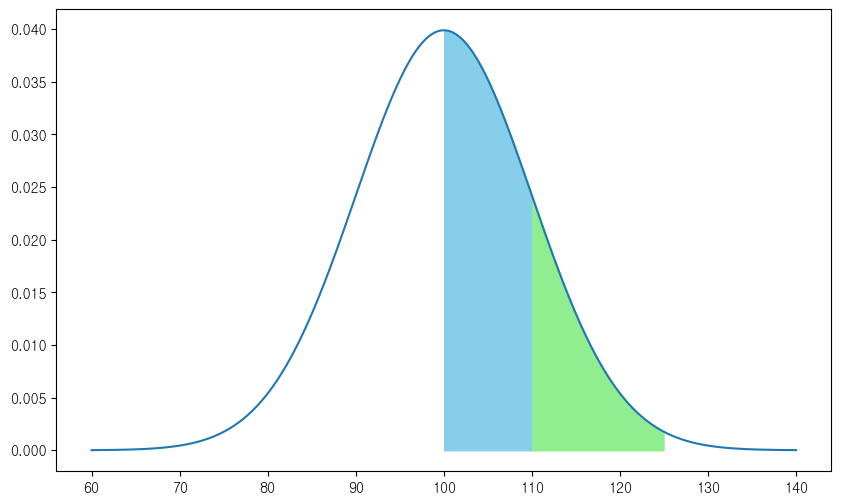

In [73]:
# 시각화
x = np.linspace(mu-4*sigma, mu+4*sigma, 1000)
y =norm.pdf(x, mu ,sigma)
plt.plot(x,y)
plt.fill_between(x,y, where=(x>=100)&(x<=110), color='skyblue')
plt.fill_between(x,y, where=(x>110)&(x<=125), color='lightgreen')
plt.show()